In [6]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import os

In [7]:
RESOURCES_PATH = '../resources/sounds/'
cargo_path = os.path.join(RESOURCES_PATH, 'cargo.wav')

In [13]:
sampling_freq, data = wavfile.read(cargo_path)
print(data.shape, sampling_freq)

sig_0 = data[:, 0]  # channel 0
sig_1 = data[:, 1]  # channel 1

(1225014, 2) 48000


<ipython-input-13-9d39d2b7dcf0>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, data = wavfile.read(cargo_path)
<ipython-input-13-9d39d2b7dcf0>:1: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  sampling_freq, data = wavfile.read(cargo_path)


In [14]:
from visualisation_2 import plot_sig, plot_sig_add

# plt.figure(figsize=(15, 10))
# plot_sig_add(data[:, 0], sampling_freq)
# plot_sig_add(data[:, 1], sampling_freq, title='Signal', xlabel='Time [s]', ylabel='Amplitude')
# plt.show()

# plot_sig(data[:, 0], sampling_freq)
# plot_sig(data[:, 1], sampling_freq)

In [19]:
from scipy.fft import rfft, rfftfreq, irfft

N = sig_0.shape[0]
yf = rfft(sig_0)
xf = rfftfreq(N, 1 / sampling_freq)

In [34]:
from absorption import absorption

kwargs = {
    'depth': 0.05,
    'temperature': 8,
    'salinity': 35,
    'pH': 8
}
absorption_dbkm = absorption(xf, **kwargs)


distance = 0.01# 10  # in km
absorption_db = absorption_dbkm * distance
absorption_ratio = np.power(10, absorption_db / 10)
# print(1 / absorption_ratio)
yf_absorbed = np.multiply(yf, 1 / absorption_ratio)

<ipython-input-34-7a9d2a07915a>:14: RuntimeWarning: overflow encountered in power
  absorption_ratio = np.power(10, absorption_db / 10)


Text(0, 0.5, 'Amplitude')

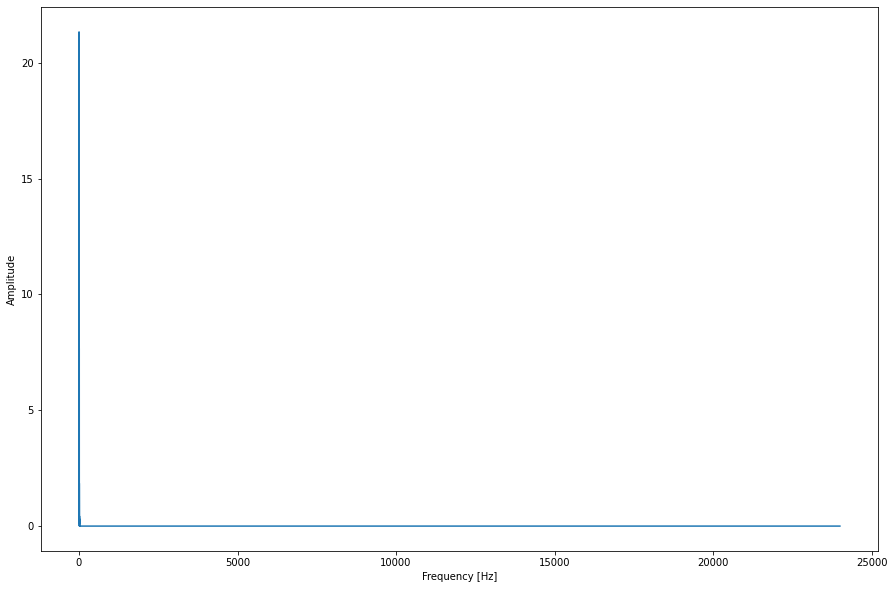

In [41]:
plt.figure(figsize=(15, 10))
# plt.plot(xf[:1000], np.abs(yf_absorbed)[:1000])
plt.plot(xf[:], np.abs(yf_absorbed)[:])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

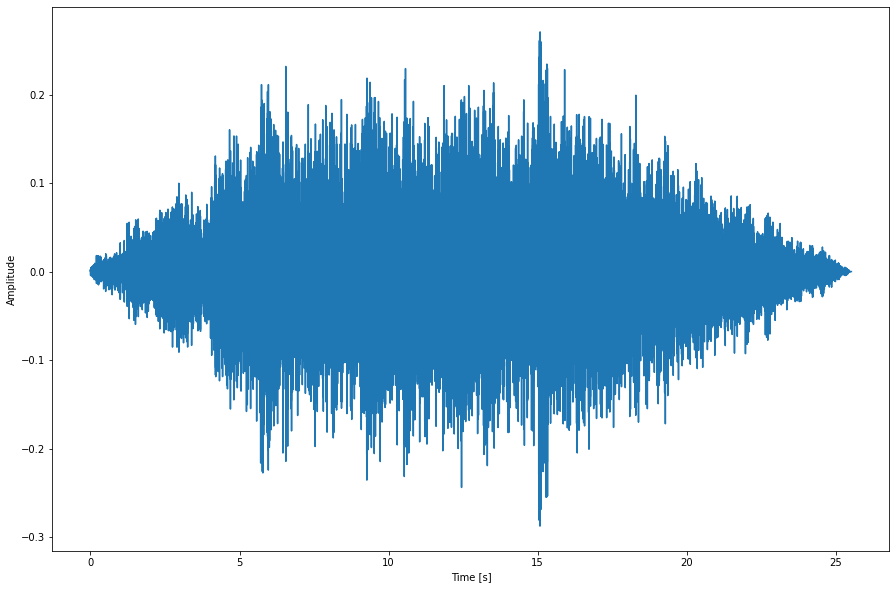

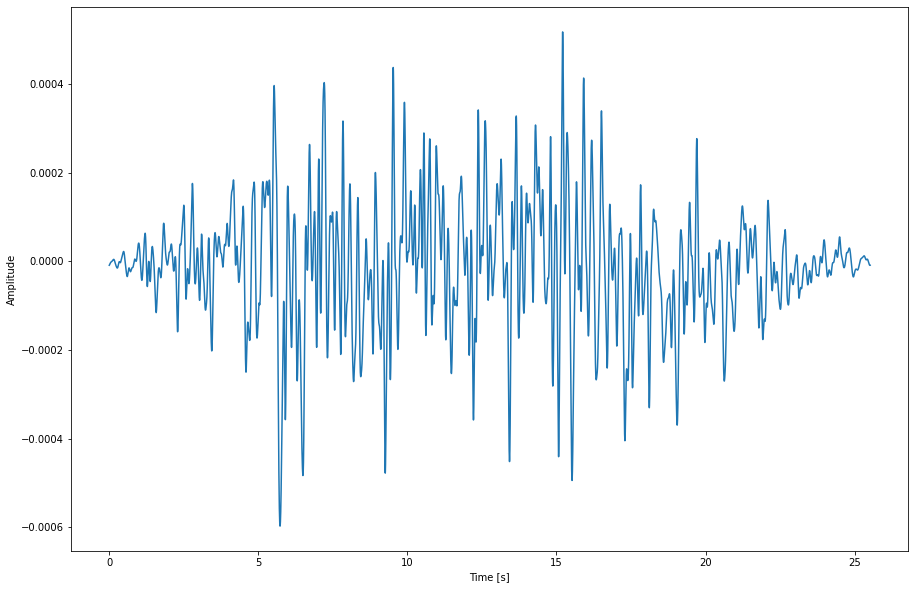

In [36]:
sig_absorbed = irfft(yf_absorbed)
plot_sig(sig_0, sampling_freq)
plot_sig(sig_absorbed, sampling_freq)

In [37]:
wavfile.write('out.wav', sampling_freq, sig_absorbed)